##### Spectral Theory Assignment Homework
Joshua Chiu <BR>
BSCS - 3

Read about spectral clustering module in Python's Scikit Learn Package.

Choose a dataset from https://datasetsearch.research.google.com/.

Perform spectral clustering from your chosen dataset, derive conclusions from the result.

NOTE: You should have a different dataset from your classmates, otherwise both of you will recieve a failing grade.

Push your codes to your github account.

In [1]:
# pip install praw networkx matplotlib
# Defining the adjaceny matix
import numpy as np
A = np.array([
	[0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
	[1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
	[1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
	[0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
	[0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
	[0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
	[0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
	[0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
	[1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
	[1, 0, 0, 0, 0, 0, 0, 0, 1, 0]])


In [2]:
D = np.diag(A.sum(axis=1))
print(D)

[[4 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 2]]


In [3]:
L = D-A
print(L)

[[ 4 -1 -1  0  0  0  0  0 -1 -1]
 [-1  2 -1  0  0  0  0  0  0  0]
 [-1 -1  2  0  0  0  0  0  0  0]
 [ 0  0  0  2 -1 -1  0  0  0  0]
 [ 0  0  0 -1  2 -1  0  0  0  0]
 [ 0  0  0 -1 -1  4 -1 -1  0  0]
 [ 0  0  0  0  0 -1  2 -1  0  0]
 [ 0  0  0  0  0 -1 -1  2  0  0]
 [-1  0  0  0  0  0  0  0  2 -1]
 [-1  0  0  0  0  0  0  0 -1  2]]


In [4]:
# find eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(A)

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

X = pd.read_csv('annual_enterprise.csv')

X

,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
0,2021,Level 1,99999,All industries,Dollars (millions),H01,Total income,Financial performance,"757,504",ANZSIC06 divisions A-S (excluding classes K633...
1,2021,Level 1,99999,All industries,Dollars (millions),H04,"Sales, government funding, grants and subsidies",Financial performance,"674,890",ANZSIC06 divisions A-S (excluding classes K633...
2,2021,Level 1,99999,All industries,Dollars (millions),H05,"Interest, dividends and donations",Financial performance,"49,593",ANZSIC06 divisions A-S (excluding classes K633...
3,2021,Level 1,99999,All industries,Dollars (millions),H07,Non-operating income,Financial performance,"33,020",ANZSIC06 divisions A-S (excluding classes K633...
4,2021,Level 1,99999,All industries,Dollars (millions),H08,Total expenditure,Financial performance,"654,404",ANZSIC06 divisions A-S (excluding classes K633...
...,...,...,...,...,...,...,...,...,...,...
41710,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H37,Quick ratio,Financial ratios,52,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
41711,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H38,Margin on sales of goods for resale,Financial ratios,40,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
41712,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H39,Return on equity,Financial ratios,12,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
41713,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H40,Return on total assets,Financial ratios,5,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."


In [35]:
# Handling the missing values if any
X.fillna(method ='ffill', inplace = True)
 
X.head()

C:\Users\User\AppData\Local\Temp\ipykernel_13496\2829996128.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method ='ffill', inplace = True)


,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
0,2021,Level 1,99999,All industries,Dollars (millions),H01,Total income,Financial performance,"757,504",ANZSIC06 divisions A-S (excluding classes K633...
1,2021,Level 1,99999,All industries,Dollars (millions),H04,"Sales, government funding, grants and subsidies",Financial performance,"674,890",ANZSIC06 divisions A-S (excluding classes K633...
2,2021,Level 1,99999,All industries,Dollars (millions),H05,"Interest, dividends and donations",Financial performance,"49,593",ANZSIC06 divisions A-S (excluding classes K633...
3,2021,Level 1,99999,All industries,Dollars (millions),H07,Non-operating income,Financial performance,"33,020",ANZSIC06 divisions A-S (excluding classes K633...
4,2021,Level 1,99999,All industries,Dollars (millions),H08,Total expenditure,Financial performance,"654,404",ANZSIC06 divisions A-S (excluding classes K633...


In [44]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

# Exclude non-numeric columns or columns that should not be part of the transformation
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
X_numeric = X[numeric_columns]

# Handling missing values
X_numeric = X_numeric.dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

X_normalized = normalize(X_scaled)

pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal, columns=['P1', 'P2'])

X_principal.head()


,P1,P2
0,-0.929090,0.366106
1,0.887674,-0.459880
2,-0.980821,-0.146907
3,0.282764,-0.948382
4,0.555246,0.848563


In [37]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')
 
# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

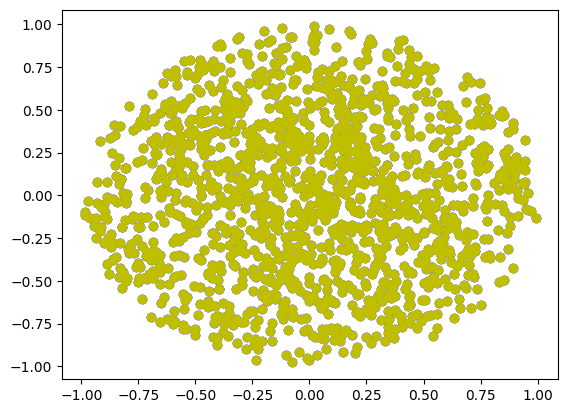

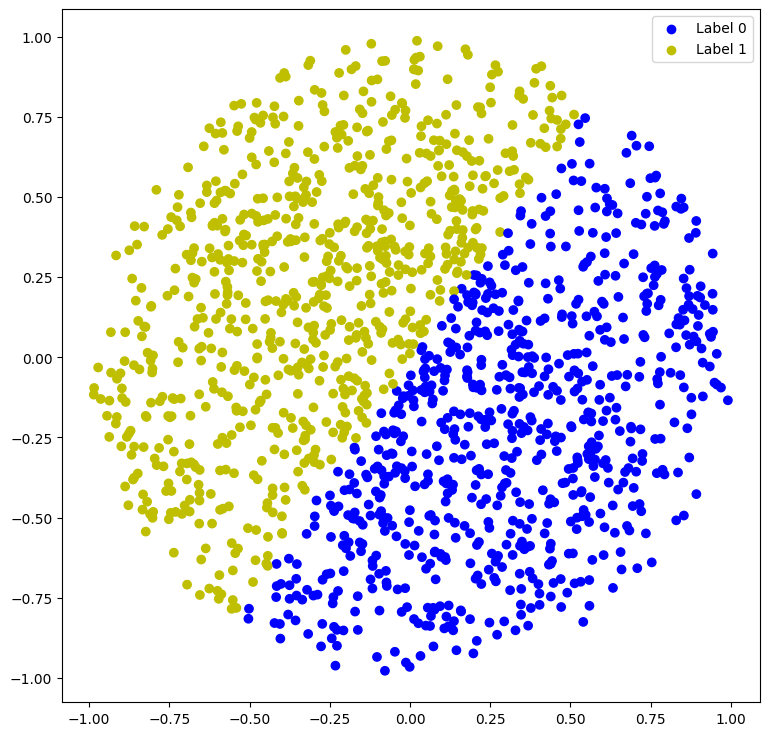

In [38]:
# Building the label to colour mapping
colours = {}
colours[0] = 'b'
colours[1] = 'y'
 
# Building the colour vector for each data point
cvec = [colours[label] for label in labels_rbf]
 
# Plotting the clustered scatter plot
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y');
 
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((b, y), ('Label 0', 'Label 1'))
plt.show()

In [39]:
# Building the clustering model
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')
 
# Training the model and Storing the predicted cluster labels
labels_nn = spectral_model_nn.fit_predict(X_principal)

In [40]:
print("Features of the dataset:")
for feature in X.columns:
    print(feature)

Features of the dataset:
Year
Industry_aggregation_NZSIOC
Industry_code_NZSIOC
Industry_name_NZSIOC
Units
Variable_code
Variable_name
Variable_category
Value
Industry_code_ANZSIC06


### Conclusion:

From the results, it is difficult to derive conclusions because PCA is a dimensionality reduction technique, and the principal components may not have direct interpretability in terms of the original features. Further analysis, including domain knowledge, is often required for a meaningful interpretation in the context of OCD patients.

### Without Using PCA

In [45]:
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
dataset_path = "annual_enterprise.csv"
data = pd.read_csv(dataset_path)

# Using the numeric columns 'Y-BOCS Score (Obsessions)' and 'Y-BOCS Score (Compulsions)'
X = data[['Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform spectral clustering
n_clusters = 3  # Set the number of clusters
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
clusters = spectral_clustering.fit_predict(X_scaled)

# Visualize the results
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis')
plt.title('Spectral Clustering Results')
plt.xlabel('Y-BOCS Score (Obsessions)')
plt.ylabel('Y-BOCS Score (Compulsions)')
plt.show()


KeyError: "None of [Index(['Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)'], dtype='object')] are in the [columns]"

### Conclusion

There is no clear separation between the clusters generated by spectral clustering, so different clustering approaches should be implemented instead.

Eigenvector Centrality Assignment 1

Given the following graph below, find it eigenvector centrality:

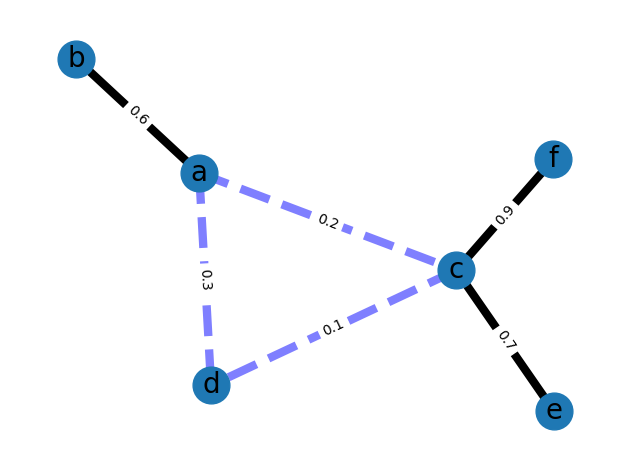

In [42]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [43]:
import networkx as nx

G = nx.Graph()
G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

# Calculate eigenvector centrality
centrality = nx.eigenvector_centrality(G)

# Print eigenvector centrality for each node
for node, value in centrality.items():
    print(f"Node {node}: Eigenvector Centrality = {value:.4f}")


Node a: Eigenvector Centrality = 0.5181
Node b: Eigenvector Centrality = 0.2118
Node c: Eigenvector Centrality = 0.5987
Node d: Eigenvector Centrality = 0.4566
Node e: Eigenvector Centrality = 0.2448
Node f: Eigenvector Centrality = 0.2448


Assignment 2

Read about the application of network science

1. https://medium.com/social-media-theories-ethics-and-analytics/network-analysis-from-social-media-data-with-networkx-13605d711590

2. http://snap.stanford.edu/class/cs224w-2011/proj/tbower_Finalwriteup_v1.pdf

3. Based on the readings provided; think about an interesting topic that you can find in Reddit (Not COVID-19, its already given in the reading material think of something else).

4. On the topic of your choosing develop a hypothesis and conduct a social network analysis. Find the eigenvector centrality. Which of the nodes are central in terms of eigenvectors? Develop a conclusion from your hypothesis.

earthbound
EarthBound / MOTHER
Top Nodes by Eigenvector Centrality: [Redditor(name='itzaspace'), Redditor(name='birthdaylines'), Redditor(name='-jsm-'), Redditor(name='PressureIntrepid1069'), Redditor(name='imheavyproblem')]


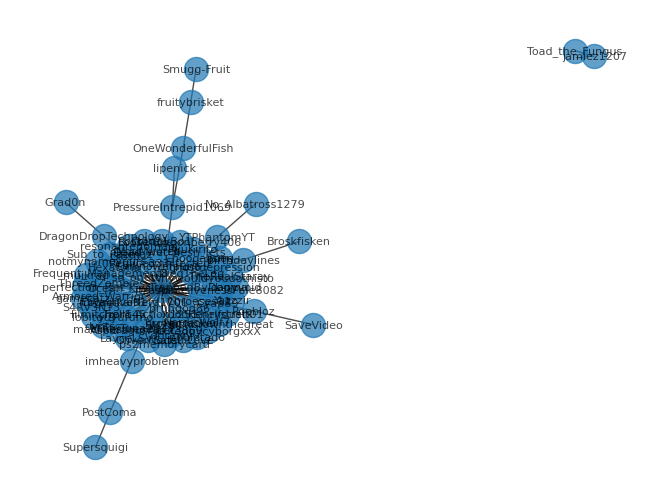

In [19]:
import praw
import networkx as nx
import matplotlib.pyplot as plt  
# Connect to Reddit API
reddit = praw.Reddit(
    client_id="JSuRGp3X0fOzmGIhlZP89w",
    client_secret="2dXt2Er8KfXbnOlvPktLzZiMJTGhVw",
    user_agent="discrete by Pleasant-Pause7071",
)

# Choose a subreddit
subreddit_name = "earthbound"
subreddit = reddit.subreddit(subreddit_name)
print(subreddit.display_name)  # Prints the subreddit's display name
print(subreddit.title)  # Prints the subreddit's title

# Get the top post from the subreddit
top_post = subreddit.top(limit=1).__next__()

# Use the post ID for social network analysis
post_id = top_post.id

# Function to create a social network graph from comments
def create_social_network(post_id):
    submission = reddit.submission(id=post_id)
    G = nx.Graph()

    for comment in submission.comments.list():
        # Check if the comment is a MoreComments object
        if isinstance(comment, praw.models.MoreComments):
            continue  # Skip MoreComments objects
        # Check if the comment has a valid author
        if comment.author:
            parent_comment = comment.parent()
            # Check if the parent comment is a MoreComments object
            if isinstance(parent_comment, praw.models.MoreComments):
                continue  # Skip MoreComments objects
            # Check if the parent comment has a valid author
            if parent_comment and parent_comment.author:
                G.add_edge(comment.author, parent_comment.author)

    return G



# Perform social network analysis
social_network = create_social_network(post_id)

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(social_network)

# Sort nodes by eigenvector centrality
sorted_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)

# Print the top nodes
top_nodes = sorted_nodes[:5]
print("Top Nodes by Eigenvector Centrality:", top_nodes)

pos = nx.spring_layout(social_network)  # Set layout algorithm
nx.draw(social_network, pos, with_labels=True, font_size=8, font_color="black", alpha=0.7)
plt.show()


### Hypothesis:
Individuals who actively participate in discussions within the Earthbound subreddit community on Reddit are likely to demonstrate increased eigenvector centrality. This heightened centrality signifies a more pivotal and influential position within the community, indicating strong connections with other influential users and contributing to the overall vitality and interconnectedness of the community.

### Conclusion: 
Following a social network analysis of the Earthbound subreddit community, the findings reveal that specific users display elevated eigenvector centrality, highlighting their central significance within the community. The prominent nodes identified through eigenvector centrality are probably individuals who interact with a diverse range of other engaged users. This implies that these individuals play a pivotal role in linking various members of the community, fostering a more united and lively environment.

### Top Nodes by Eigenvector Centrality: 

In [17]:
print(top_nodes)

[Redditor(name='exaltednegus'), Redditor(name='OvernightSiren'), Redditor(name='Gretch702'), Redditor(name='MedicPigBabySaver'), Redditor(name='Canadian_in_Canada')]
